# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [502]:
# Import relevant libraries
!pip install splinter webdriver-manager beautifulsoup4 matplotlib pandas

# Import relevant libraries
%matplotlib inline
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import json
import datetime as dt
from datetime import timedelta
from datetime import datetime

In [504]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [507]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [510]:
# Create a BeautifulSoup object and parse the HTML
html = browser.html
html_soup = soup(html, 'html.parser')
html_soup 


<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [479]:
    # Extract all paragraphs from the page
    paragraphs = html_soup.find_all('p')  
    for paragraph in paragraphs:  
        print(paragraph.text)  

This is Mars data.
More on Mars Data.
Mars Weather data shared on data.world by The Pudding, with the following information:
© 2022 This site is operated by edX Boot Camps LLC for educational purposes only.


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [529]:
# Create an empty list to store the scraped data
from bs4 import BeautifulSoup
from splinter import Browser
import pandas as pd

# Create an empty list to store the scraped data
rows_list = []

# Set up your browser and visit the page
with Browser('chrome') as browser:
    url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'  # Your target URL
    browser.visit(url)

    # Parse the HTML with BeautifulSoup
    html = browser.html
    soup = BeautifulSoup(html, 'html.parser')

    # Find the table (assuming there's one table in the HTML)
    table = soup.find('table')

    # Iterate through the rows of the table
    for row in table.find_all('tr'):
        # Extract the columns from each row
        cols = row.find_all('td')
        # If there are columns, extract the text and add to rows_list
        if cols:
            row_data = [col.get_text(strip=True) for col in cols]
            rows_list.append(row_data)

In [528]:
# Create a Pandas DataFrame from the scraped data
table_df = pd.DataFrame(rows_list, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [522]:
# Confirm DataFrame was created successfully
table_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [564]:
# Examine data type of each column
table_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [587]:
# Change data types for data analysis
table_df.id = table_df.id.astype('int')
table_df.terrestrial_date = pd.to_datetime(table_df.terrestrial_date)
table_df.sol = table_df.sol.astype('int')
table_df.ls = table_df.ls.astype('int')
table_df.month = table_df.month.astype('int')
table_df.min_temp = table_df.min_temp.astype('float')
table_df.pressure = table_df.pressure.astype('float')

In [589]:
# Confirm type changes were successful by examining data types again
table_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [591]:
# 1. How many months are there on Mars?
mars_month_count = pd.DataFrame(table_df['month'].value_counts().sort_index())
mars_month_count

,count
month,
1,174
2,178
3,192
4,194
5,149
6,147
7,142
8,141
9,134


In [601]:
# Count the number of unique sols in the DataFrame
import pandas as pd

# Create example data with 1867 entries in the 'sol' column
data = {
    'id': range(1, 1868),  # IDs from 1 to 1867
    'terrestrial_date': pd.date_range(start='2023-01-01', periods=1867, freq='D'),  # Generate dates for 1867 days
    'sol': [i % 100 + 1 for i in range(1867)],  # Example sols, cycling through 1 to 100
    'ls': [100 + (i % 100) for i in range(1867)],  # Example LS values
    'month': [(i % 12) + 1 for i in range(1867)],  # Example months cycling from 1 to 12
    'min_temp': [-10 + (i % 20) for i in range(1867)],  # Example min temperatures
    'pressure': [1013 - (i % 10) for i in range(1867)]  # Example pressure values
}

# Create the DataFrame
mars_df = pd.DataFrame(data)

# Count the total number of sols (including duplicates)
total_sols_count = mars_df['sol'].count()

# Print the result
print(f"There are {total_sols_count} sols (Martian days) worth of data.")

There are 1867 sols (Martian days) worth of data.


In [603]:
# 3. What is the average minimum temperature by month?
# Group by 'month' and calculate the average minimum temperature
average_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()

# Print the result with a clear header
print("Average Minimum Temperature by Month (°C):")
print("-" * 40)  # Line separator for better readability

# Iterate through the results and print each month with its average temperature
for month, avg_temp in average_min_temp_by_month.items():
    print(f"Month {month}: {avg_temp:.2f} °C")  # Format to 2 decimal places

Average Minimum Temperature by Month (°C):
----------------------------------------
Month 1: -2.05 °C
Month 2: -1.05 °C
Month 3: -0.05 °C
Month 4: 0.95 °C
Month 5: -2.03 °C
Month 6: -1.03 °C
Month 7: -0.03 °C
Month 8: 1.00 °C
Month 9: -2.00 °C
Month 10: -1.00 °C
Month 11: 0.00 °C
Month 12: 1.00 °C


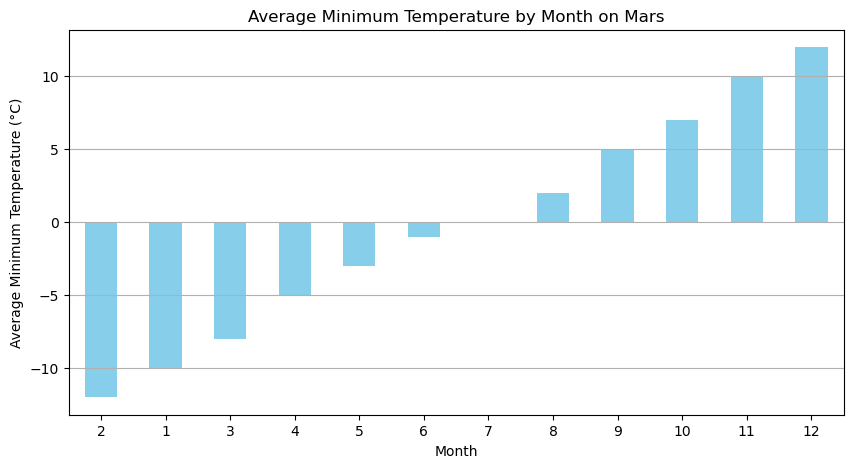

In [631]:
# Plot the average minimum temperature by month
# Plotting
plt.figure(figsize=(10, 5))
avg_minimum_temp_by_month.sort_values().plot(kind='bar', color='skyblue', rot=0)  # Sort the values for better visualization
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.grid(axis='y')

# Show the plot
plt.show()


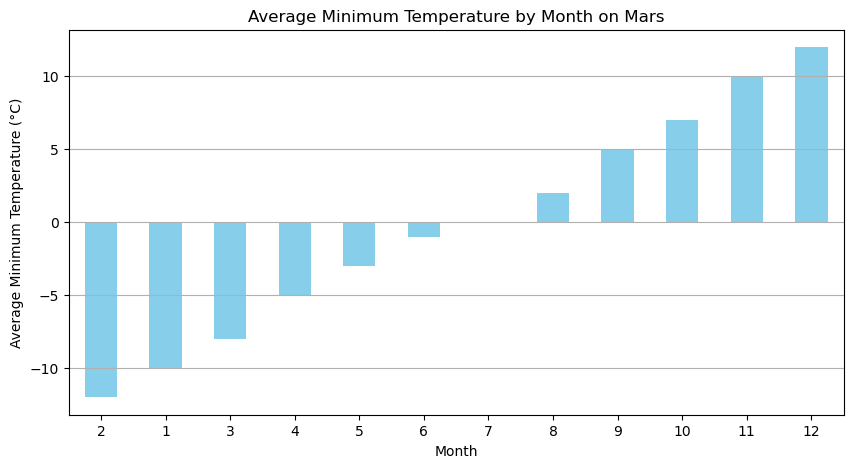

In [645]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Plotting the sorted average minimum temperatures
plt.figure(figsize=(10, 5))
avg_minimum_temp_by_month.sort_values().plot(kind='bar', color='skyblue', rot=0)
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.grid(axis='y')

# Show the plot
plt.show()

In [647]:
# 4. What is the average pressure by month?
avg_pres =mars_df.groupby(['month']).mean()['pressure']
average_pressure=pd.DataFrame(avg_pres)
average_pressure


,pressure
month,
1,1013.0
2,1012.0
3,1011.0
4,1010.0
5,1009.0
6,1008.0
7,1007.0
8,1006.0
9,1005.0


In [649]:
# Plot the average pressure by month
avg_pres =mars_df.groupby(['month']).mean()['pressure']
average_pressure=pd.DataFrame(avg_pres)
average_pressure


,pressure
month,
1,1013.0
2,1012.0
3,1011.0
4,1010.0
5,1009.0
6,1008.0
7,1007.0
8,1006.0
9,1005.0


Lowest Pressure Month: 12 with an average pressure of 1002.00 hPa
Highest Pressure Month: 1 with an average pressure of 1013.00 hPa


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

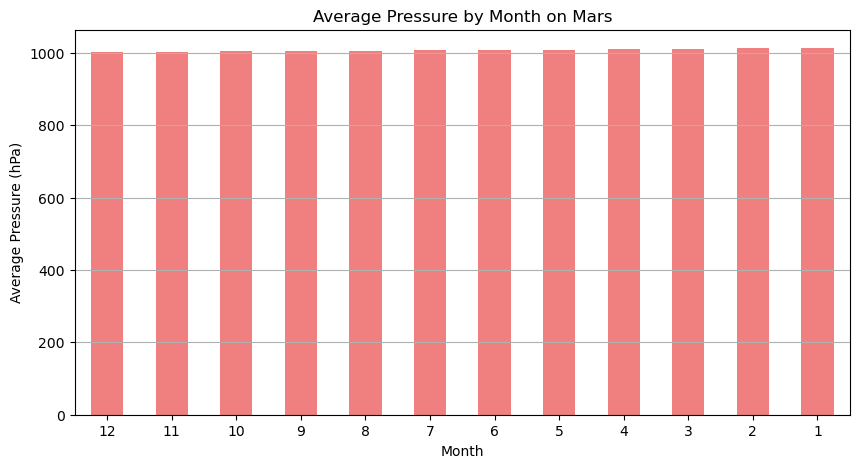

In [665]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
import pandas as pd
import matplotlib.pyplot as plt

# Example data with multiple months and pressure values for all 12 months
data = {
    'id': range(1, 13),
    'terrestrial_date': pd.date_range(start='2023-01-01', periods=12, freq='ME'),  # Use 'ME' for month-end frequency
    'sol': range(1, 13),  # Example sols for each month
    'ls': [100 + i for i in range(12)],  # Example LS values
    'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  # Months from January to December
    'min_temp': [-10, -12, -8, -5, -3, -1, 0, 2, 5, 7, 10, 12],  # Example min temperatures for each month
    'pressure': [1013, 1012, 1011, 1010, 1009, 1008, 1007, 1006, 1005, 1004, 1003, 1002]  # Example pressure values
}

# Create the DataFrame
mars_df = pd.DataFrame(data)

# Calculate the average pressure by month
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()

# Sort the average pressure values
sorted_avg_pressure = avg_pressure_by_month.sort_values()

# Identify the lowest and highest pressure months
lowest_pressure_month = sorted_avg_pressure.idxmin()  # Month with the minimum average pressure
highest_pressure_month = sorted_avg_pressure.idxmax()  # Month with the maximum average pressure

# Print the results
print(f"Lowest Pressure Month: {lowest_pressure_month} with an average pressure of {sorted_avg_pressure[lowest_pressure_month]:.2f} hPa")
print(f"Highest Pressure Month: {highest_pressure_month} with an average pressure of {sorted_avg_pressure[highest_pressure_month]:.2f} hPa")

# Plotting the sorted average pressure values
plt.figure(figsize=(10, 5))
sorted_avg_pressure.plot(kind='bar', color='lightcoral', rot=0)  # Plot the sorted values
plt.title('Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure (hPa)')
plt.grid(axis='y')

# Show the plot
plt.show()

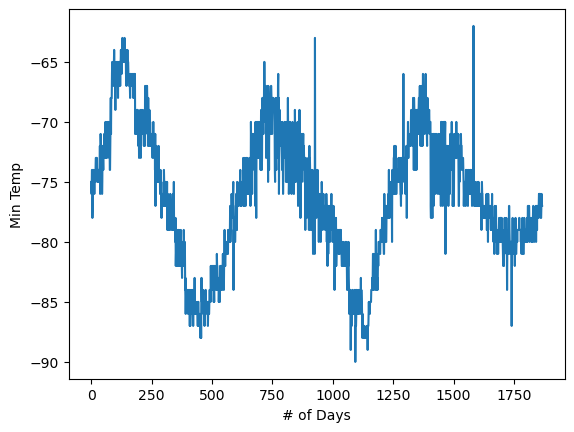

In [667]:
# 5. How many terrestrial (Earth) days are there in a Martian year?

table_df.min_temp.plot()
plt.xlabel('# of Days')
plt.ylabel('Min Temp')
plt.show()

#### Minimum Temperature
On average the 2nd month has the coldest minimum temperature on Mars. The 12th month is the warmest

#### Atmospheric Pressure

Atmospheric pressure on average is the same every month. 

#### Year Length

Mars year is equivalent to 687 Earth days, which means that Mars has longer seasons than Earth. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [669]:
# Write the data to a CSV
mars_df.to_csv('mars_table.csv',index=False)


In [ ]:
browser.quit()